In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("../files/rating-and-performance-nonull.csv", index_col = 0)
df.head(2)

,title,price,retail_price,units_sold,uses_ad_boosts,rating_x,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_y,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,urgency_text_rate,discount_percentage,seller_reputation
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,No,3.76,54,26.0,8.0,10.0,1.0,9.0,No,Good,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,unknown,568,595097d6a26f6e070cb878d1,5e9ae51d43d6a96e303acdb0,1,100,100.0,4.129,568.0,16.00,14.00,54.0,100.0,12.5,Good
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.0,22,20000,Yes,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,No,Good,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,58940d436a0d3d5da4e95a38,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,50.0,-175.0,Ordinary


1. La variable `price` representa el precio de los productos. Calcula tanto la media como la mediana de los precios y explica la diferencia entre ambas medidas. Proporciona ejemplos de situaciones en las que la mediana podría ser preferible sobre la media.

In [8]:
media = df['price'].mean()
mediana = df['price'].median()

print(f"La media de 'price' es: {media}\nY la mediana es: {mediana}")

La media de 'price' es: 8.325371900826436
Y la mediana es: 8.0


- Diferencia entre ambas: La media es el resultado de sumar el valor de todos los datos y dividirlos por la cantidad de datos existente mientras que la mediana es aquel dato cuyo valor está justo en el medio de todos los demás, por lo que no se vería afectada por posibles outliers.
- Situaciones en las que la mediana es preferible: La mediana es más útil que la media especialmente en aquellos conjuntos de datos que puedan contener valores extremos o sesgados (outliers)

2. Crea una tabla de correlación que muestre cómo se relacionan las variables `price`, `retail_price`, `units_sold`, `rating_sold`, y `rating_count`. Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.

In [12]:
from itertools import combinations

# definimos la lista los nombres de las variables numéricas (como no existía rating_sold, se ha intercambiado por rating_x)
numericas = ['price' , 'retail_price' , 'units_sold' , 'rating_x' , 'rating_count']

# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))

# printeamos los resultados, una lista de tuplas
combinaciones

# creamos una función para identificar si las relaciones entre las variables son lienales o no
def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
    Identifica si las relaciones entre pares de variables en un DataFrame son lineales o no.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        El DataFrame que contiene las variables a analizar.

    lista_combinacion_columnas : list of tuples
        Una lista de tuplas donde cada tupla contiene dos nombres de columnas del DataFrame que se desea analizar.

    Returns:
    --------
    relaciones_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que tienen una relación lineal.

    relaciones_no_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que no tienen una relación lineal.

    """
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

lineal, no_lineal = identificar_linealidad(df, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")


Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('price', 'retail_price'), ('price', 'units_sold'), ('price', 'rating_x'), ('price', 'rating_count'), ('retail_price', 'units_sold'), ('retail_price', 'rating_x'), ('retail_price', 'rating_count'), ('units_sold', 'rating_x'), ('units_sold', 'rating_count'), ('rating_x', 'rating_count')]


In [14]:
df_correlaciones = df[numericas].corr(method = "spearman")

df_correlaciones

,price,retail_price,units_sold,rating_x,rating_count
price,1.000000,0.536104,0.061769,0.055564,0.129345
retail_price,0.536104,1.000000,-0.027991,0.043173,0.024439
units_sold,0.061769,-0.027991,1.000000,0.026794,0.941988
rating_x,0.055564,0.043173,0.026794,1.000000,0.046749
rating_count,0.129345,0.024439,0.941988,0.046749,1.000000


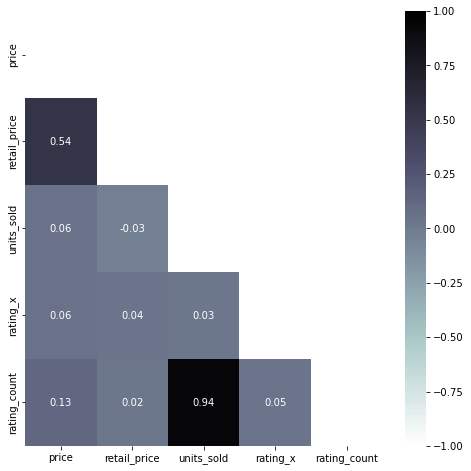

In [43]:
plt.figure(figsize = (8, 8))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "bone_r", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

- En vista de los resultados, se observa:
    - Una correlación fuerte entre units_sold y rating_count, lo que sugiere que a mayor número de unidades vendidas, mayor cantidad de rating obtenidos
    - Una correlación moderada entre retail_price y price, lo cual nos lleva a pensar que ambos tipos de precio tienen una ligera relación entre sí y cuando sube uno, el otro también
    - El resto de correlaciones son débiles, lo que no refleja la existencia de una relación fuerte entre variables, y en su mayoría positivas

3. Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas `uses_ad_boosts` y `badge_product_quality`. ¿Cómo afecta la calidad del producto al uso de anuncios promocionales? Proporciona interpretaciones basadas en la tabla de contingencia.


In [44]:
tabla_contingencia = pd.crosstab(df['uses_ad_boosts'], df['badge_product_quality'], normalize=True) * 100

tabla_contingencia

badge_product_quality,Excellent,Good
uses_ad_boosts,,
No,4.195804,52.511125
Yes,3.242212,40.050858


- En función de la tabla de contingencia, podemos observar que la calidad sí afecta al uso de anuncios:
    - Los productos de calidad excelente reciben una atención menor en el uso de anuncios que aquellos cuya calidad se percibe como buena (3% vs. 40%)
    - En los productos cuya calidad es buena se observa que hay una ligera frecuencia superior de aquellos que no utilizan anuncios

4. Crea una tabla de contingencia que examine la relación entre las variables categóricas `badge_local_product` y `badge_fast_shipping`. ¿Hay alguna tendencia en la que los productos locales estén más asociados con envíos rápidos? Explícalo.

In [46]:
tabla_contingencia2 = pd.crosstab(df['badge_local_product'], df['badge_fast_shipping'], normalize=True) * 100

tabla_contingencia2

badge_fast_shipping,No,Yes
badge_local_product,,
No,97.457088,0.699301
Yes,1.271456,0.572155


- En función de la tabla de contingencia, se observa:
    - En los productos no locales, la frecuencia de envío rápido es del 0.70% y la frecuencia de envío estándar es del 97.46%
    - En cambio, para los productos locales, la frecuencia de envío rápido es del 0.57% y la frecuencia de envío estándar es del 1.27%
    - Por tanto (y en proporción), se observa un mayor uso del envío rápido en aquellos productos que sí tienen el distintivo local

5. Calcula la media y la mediana de la variable `mean_product_prices`. ¿Cómo se comparan estas medidas? ¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?

In [61]:
media2 = df['mean_product_prices'].mean()
mediana2 = df['mean_product_prices'].median()

print(f"La media de 'mean_products_prices' es: {media2}\nY la mediana es: {mediana2}")

La media de 'mean_products_prices' es: 8.325600762873485
Y la mediana es: 8.0


- Comparando la media y la mediana, se advierte que la media es ligeramente mayor que la mediana. Esto sugiere que la distribución de los precios promedio de los productos podría estar ligeramente sesgada hacia la derecha, ya que hay algunos valores más altos que están aumentando el valor de la media.

6. Realiza un análisis de correlación entre `total_units_sold` y `mean_product_ratings_count`. ¿Existe una relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos? Explica los resultados.

In [57]:
df_correlaciones2 = df[['total_units_sold' , 'mean_product_ratings_count']].corr(method = "spearman")

df_correlaciones2

,total_units_sold,mean_product_ratings_count
total_units_sold,1.000000,0.875353
mean_product_ratings_count,0.875353,1.000000


- La correlación entre la cantidad total de unidades vendidas y la calificación promedio es de 0.875, lo que indica una fuerte correlación positiva entre ambas: A medida que aumenta la cantidad total de unidades vendidas, también tiende a aumentar la calificación promedio de los productos

7. Crea una tabla de contingencia que examine la relación entre las variables categóricas `badge_local_product` y `seller_reputation`. ¿Cómo se relacionan las calificaciones de los empleados con la reputación del vendedor? Proporciona interpretaciones basadas en la tabla de contingencia.

In [59]:
tabla_contingencia3 = pd.crosstab(df['seller_reputation'], df['badge_local_product'], normalize=True) * 100

tabla_contingencia3

badge_local_product,No,Yes
seller_reputation,,
Good,57.469803,1.716465
Ordinary,40.686586,0.127146


- Los vendedores con una reputación "Buena" tienden a tener una proporción ligeramente mayor de productos con el distintivo local (1,72%) en comparación con los vendedores con una reputación "Ordinaria" (0,13%)

8. Calcula la media y la mediana de la variable `discount_percentage`. ¿Qué puedes decir sobre los descuentos promedio en los productos? ¿Hay valores atípicos en esta variable?

In [63]:
media3 = df['discount_percentage'].mean()
mediana3 = df['discount_percentage'].median()

print(f"La media de 'discount_percentage' es: {media3}\nY la mediana es: {mediana3}")

La media de 'discount_percentage' es: -192.50926255562635
Y la mediana es: -6.19


- En este caso la diferencia entre la media y la mediana es bastante significativa, lo que implica que la distribución de los descuentos puede estar sesgada hacia la izquierda, con valores atípicos (outliers) extremadamente bajos que impacten en la media

9. Utiliza una tabla de contingencia para analizar cómo se relacionan las variables categóricas `badge_fast_shipping` y `seller_reputation`. ¿Qué puedes concluir sobre la distribución de las calificaciones altas? 

In [64]:
tabla_contingencia4 = pd.crosstab(df['seller_reputation'], df['badge_fast_shipping'], normalize=True) * 100

tabla_contingencia4

badge_fast_shipping,No,Yes
seller_reputation,,
Good,58.169104,1.017165
Ordinary,40.559441,0.254291


- Los vendedores con una reputación "Buena" tienden a tener una proporción ligeramente mayor de productos con envío rápido (1,02%) en comparación con los vendedores con una reputación "Ordinaria" (0,25%)